<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E5%86%B3%E7%AD%96%E6%A0%91%E6%A1%88%E4%BE%8B_boston_housing_rental_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning

In [6]:
def notEmpty(s):
  return s!=''

# 拦截异常
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [12]:
# 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再按照每行数据进行处理
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "boston_housing.data"
fd = pd.read_csv(path,header=None)
fd.head()

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [19]:
data = np.empty((len(fd),14))
# print(data[1])
for i,d in enumerate(fd.values):
  d = map(float,filter(notEmpty,d[0].split(' ')))
  data[i]=list(d)

#data[1]
x,y=np.split(data,(13,),axis=1)
y=y.ravel()
print("numbers of data:%d,numbers of feature: %d" %x.shape)
print("target samples :%d" %y.shape[0])

numbers of data:506,numbers of feature: 13
target samples :506


In [20]:
#数据分割
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,train_size=0.8,random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：404, 测试数据集样本数目：102


In [22]:
#标准化
ss = MinMaxScaler()
x_train = ss.fit_transform(x_train,y_train)
x_test = ss.transform(x_test)
print("原始数据各个特征属性的调整最小值:", ss.min_)
print("原始数据各个特征属性的缩放数据值:", ss.scale_)

原始数据各个特征属性的调整最小值: [-7.10352762e-05  0.00000000e+00 -1.68621701e-02  0.00000000e+00
 -7.92181070e-01 -6.82314620e-01 -2.98661174e-02 -1.02719857e-01
 -4.34782609e-02 -3.56870229e-01 -1.34042553e+00 -6.38977636e-03
 -4.90780142e-02]
原始数据各个特征属性的缩放数据值: [1.12397589e-02 1.00000000e-02 3.66568915e-02 1.00000000e+00
 2.05761317e+00 1.91607588e-01 1.02986612e-02 9.09347180e-02
 4.34782609e-02 1.90839695e-03 1.06382979e-01 2.53562554e-03
 2.83687943e-02]


In [23]:
#构建模型回归
model = DecisionTreeRegressor(criterion='mse',max_depth=7) #mean squared error
#模型训练
model.fit(x_train,y_train)
#模型预测
y_test_hat = model.predict(x_test)

#模型评估

score = model.score(x_test,y_test)

print("Score:",score)


Score: 0.8186386427403661


In [25]:
#构建线性回归
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_y_test_hat = lr.predict(x_test)
lr_score = lr.score(x_test,y_test)
print("lr:",lr_score)


lr: 0.6177265992293743


In [27]:
#构建lasso
lasso = LassoCV(alphas = np.logspace(-3,1,20))
lasso.fit(x_train,y_train)
lasso_y_test_hat = lasso.predict(x_test)
lasso_score = lasso.score(x_test,y_test)
print("lasso:", lasso_score)


lasso: 0.6178877460212681


In [28]:
#构建岭回归ridge
ridge = RidgeCV(alphas= np.logspace(-3,1,20))
ridge.fit(x_train,y_train)
ridge_y_test_hat = ridge.predict(x_test)
ridge_score = ridge.score(x_test,y_test)
print("ridge:",ridge_score)



ridge: 0.6209247731652321


Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.


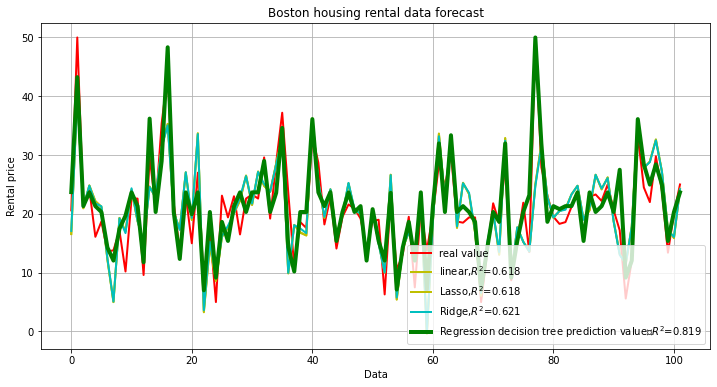

In [32]:
#画图
plt.figure(figsize=(12,6),facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test,y_test,'r-',lw=2,label = u'real value')
plt.plot(ln_x_test,lr_y_test_hat,'y-',lw=2,label=u'linear,$R^2$=%.3f'% lr_score)
plt.plot(ln_x_test, lasso_y_test_hat, 'y-', lw=2, label=u'Lasso,$R^2$=%.3f' % lasso_score)
plt.plot(ln_x_test, ridge_y_test_hat, 'c-', lw=2, label=u'Ridge,$R^2$=%.3f' % ridge_score)
plt.plot(ln_x_test, y_test_hat, 'g-', lw=4, label=u'Regression decision tree prediction value，$R^2$=%.3f' % score)
plt.xlabel(u'Data')
plt.ylabel(u'Rental price')
plt.legend(loc='lower right')
plt.grid(True)
plt.title(u'Boston housing rental data forecast')
plt.show()


In [33]:
# 参数优化
pipes = [
    Pipeline([
        ('mms', MinMaxScaler()),  ## 归一化操作
        ('pca', PCA()),  ## 降纬
        ('decision', DecisionTreeRegressor(criterion='mse'))
    ]),
    Pipeline([
        ('mms', MinMaxScaler()),
        ('decision', DecisionTreeRegressor(criterion='mse'))
    ]),
    Pipeline([
        ('decision', DecisionTreeRegressor(criterion='mse'))
    ])
]

In [34]:
# 参数
parameters = [
    {
        "pca__n_components": [0.25, 0.5, 0.75, 1],
        "decision__max_depth": np.linspace(1, 20, 20).astype(np.int8)
    },
    {
        "decision__max_depth": np.linspace(1, 20, 20).astype(np.int8)
    },
    {
        "decision__max_depth": np.linspace(1, 20, 20).astype(np.int8)
    }
]

In [35]:
# 获取数据
x_train2, x_test2, y_train2, y_test2 = x_train1, x_test1, y_train1, y_test1

for t in range(3):
    pipe = pipes[t]

    gscv = GridSearchCV(pipe, param_grid=parameters[t])

    gscv.fit(x_train2, y_train2)

    print(t, "score值:", gscv.best_score_, "最优参数列表:", gscv.best_params_)


0 score值: 0.3827446877541084 最优参数列表: {'decision__max_depth': 5, 'pca__n_components': 0.75}
1 score值: 0.7673767097725467 最优参数列表: {'decision__max_depth': 10}
2 score值: 0.7717563118074305 最优参数列表: {'decision__max_depth': 4}


In [36]:
# 使用最优参数看看正确率
mms_best = MinMaxScaler()
decision3 = DecisionTreeRegressor(criterion='mse', max_depth=4)

x_train3, x_test3, y_train3, y_test3 = x_train1, x_test1, y_train1, y_test1
x_train3 = mms_best.fit_transform(x_train3, y_train3)
x_test3 = mms_best.transform(x_test3)
decision3.fit(x_train3, y_train3)
print("正确率:", decision3.score(x_test3, y_test3))

正确率: 0.8435980902870441


In [37]:
# 查看各个不同深度的错误率
x_train4, x_test4, y_train4, y_test4 = x_train1, x_test1, y_train1, y_test1

depths = np.arange(1, 20)
err_list = []
for d in depths:
    clf = DecisionTreeRegressor(criterion='mse', max_depth=d)
    clf.fit(x_train4, y_train4)

    score1 = clf.score(x_test4, y_test4)
    err = 1 - score1
    err_list.append(err)
    print("%d深度，正确率%.5f" % (d, score1))

1深度，正确率0.32761
2深度，正确率0.62189
3深度，正确率0.78241
4深度，正确率0.84360
5深度，正确率0.83827
6深度，正确率0.82256
7深度，正确率0.80939
8深度，正确率0.82775
9深度，正确率0.80490
10深度，正确率0.82371
11深度，正确率0.79738
12深度，正确率0.82266
13深度，正确率0.82578
14深度，正确率0.79178
15深度，正确率0.80444
16深度，正确率0.77859
17深度，正确率0.80026
18深度，正确率0.79678
19深度，正确率0.77729


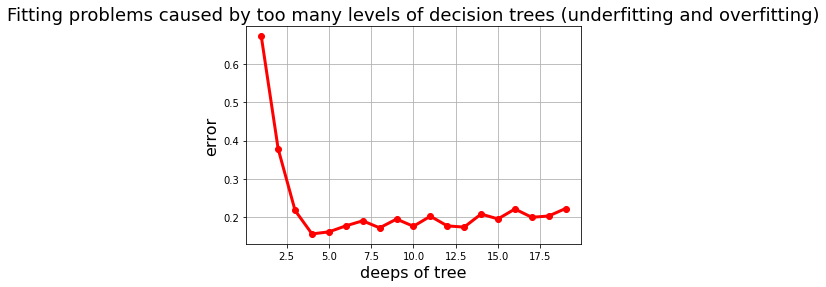

In [38]:
## 画图
plt.figure(facecolor='w')
plt.plot(depths, err_list, 'ro-', lw=3)
plt.xlabel(u'deeps of tree', fontsize=16)
plt.ylabel(u'error', fontsize=16)
plt.grid(True)
plt.title(u'Fitting problems caused by too many levels of decision trees (underfitting and overfitting)', fontsize=18)
plt.show()